In [1]:
# 혼공머신

In [2]:
# 8장 이미지를 위한 인공 신경망

In [3]:
# 8-3 합성곱 신경망의 시각화

In [41]:
from tensorflow import keras

In [57]:
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2022-08-02 08:11:22--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2022-08-02 08:11:23--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4049416 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5’

best-cnn-model.h5   100%[===================>]   3.86M  --.-KB/s    in 0.02s   

2022-08-02 08:11:24 (256 MB/s) - ‘best-cnn-model.h5’ saved [4049416/4049416]



In [58]:
model = keras.models.load_model('/best-cnn-model.h5')
model.layers

In [59]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [60]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.016128972 0.23896894


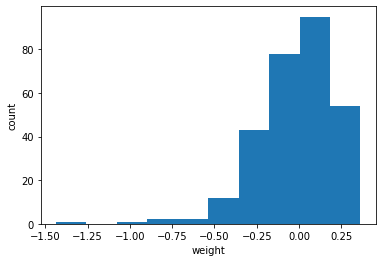

In [61]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

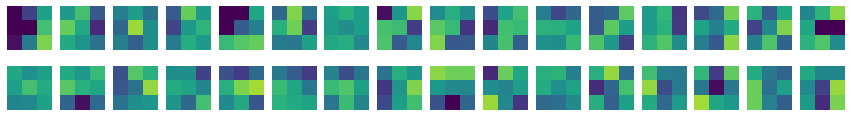

In [62]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [63]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [64]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.011537265 0.07800076


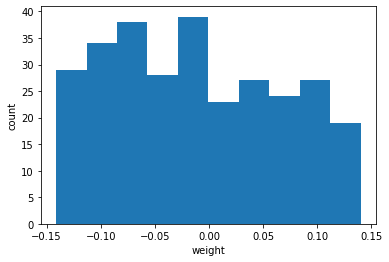

In [65]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

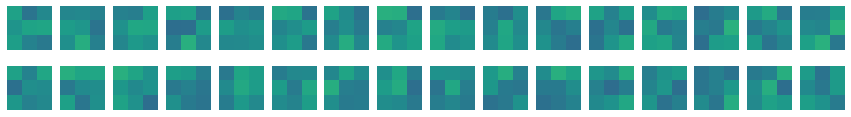

In [66]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16 + j],vmin=-0.5,vmax=0.5 )
    axs[i,j].axis('off')
plt.show()

In [67]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [68]:
conv_acti = keras.Model(model.input, model.layers[0].output)

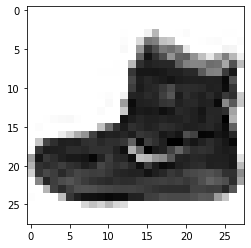

In [69]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [70]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

print(feature_maps.shape)

(1, 28, 28, 32)


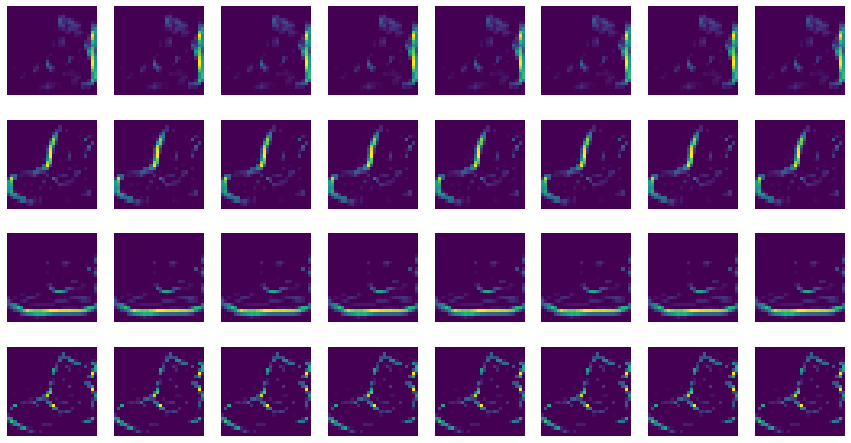

In [71]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8 + 1])
    axs[i,j].axis('off')
plt.show()

In [73]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [74]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

In [75]:
print(feature_maps.shape)

(1, 14, 14, 64)


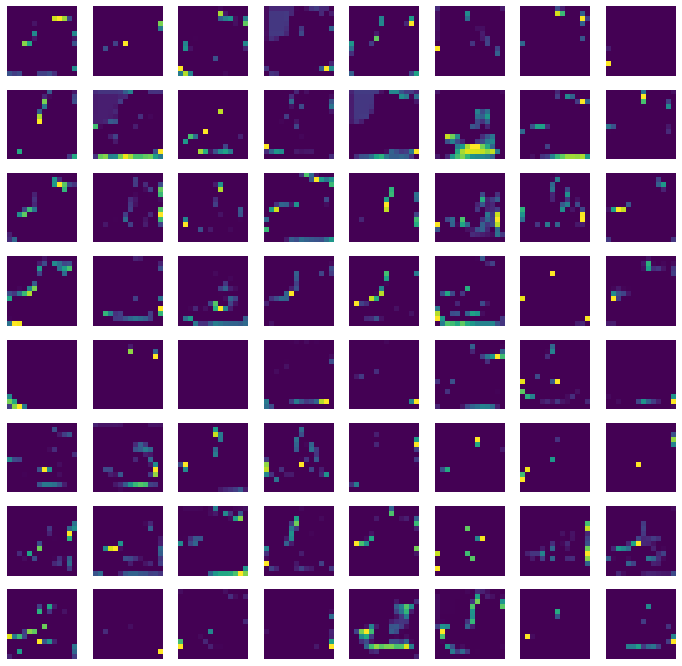

In [76]:
fig, axs = plt.subplots(8,8, figsize=(12,12))

for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()